In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.datasets import load_boston
b = load_boston()

In [ ]:
df = pd.DataFrame(b.data,columns=b.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
df["MEDV"] = b.target

In [ ]:
# tofind correlation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


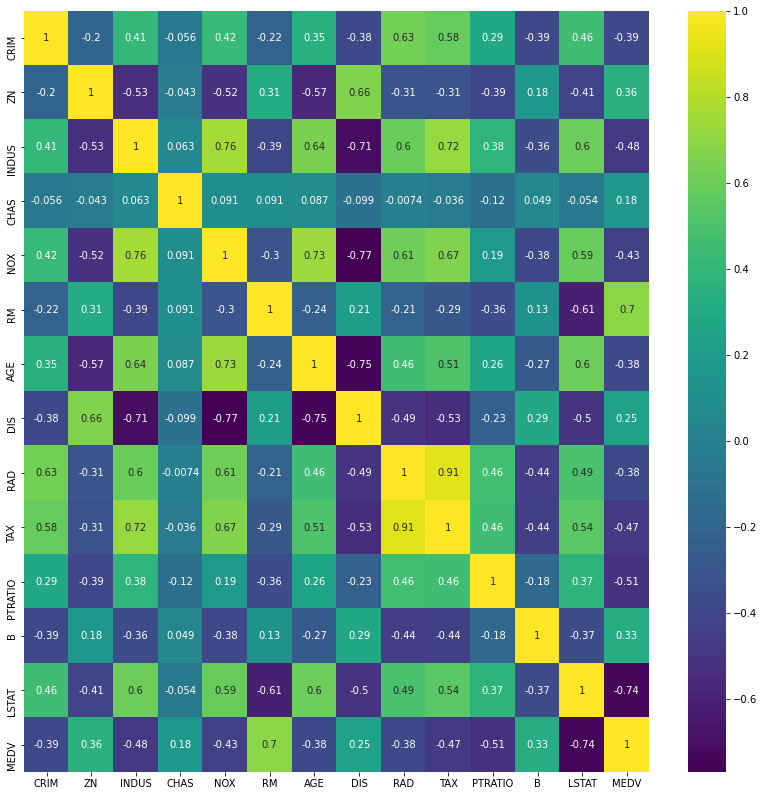

In [ ]:
#visualizing with heatmap
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

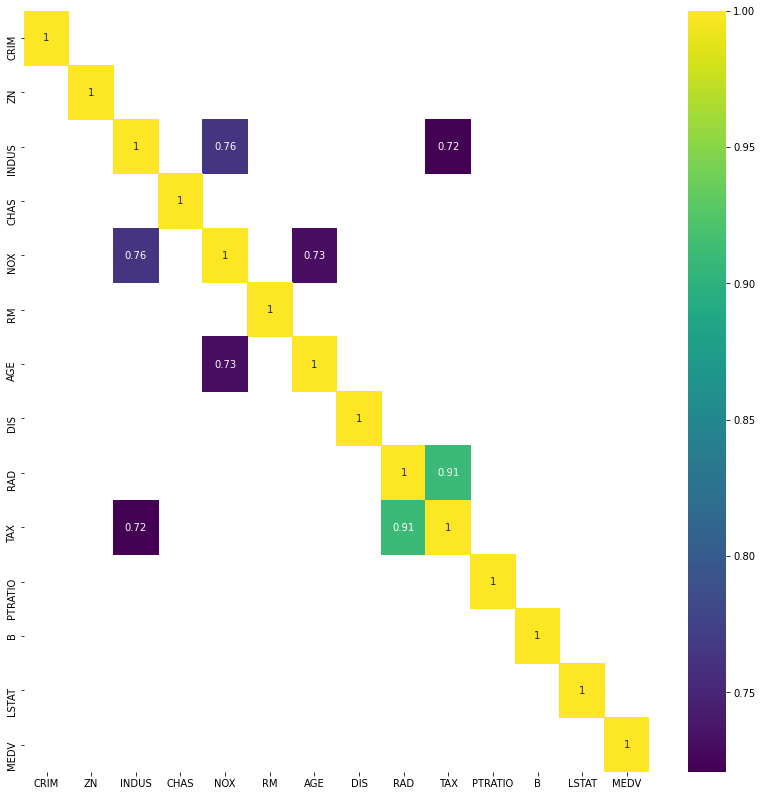

In [ ]:
#visualizing with heatmap where corr > 0.7
plt.figure(figsize=(14,14))
sns.heatmap(df.corr()[df.corr()>=0.7],annot=True,cmap="viridis")
plt.show()

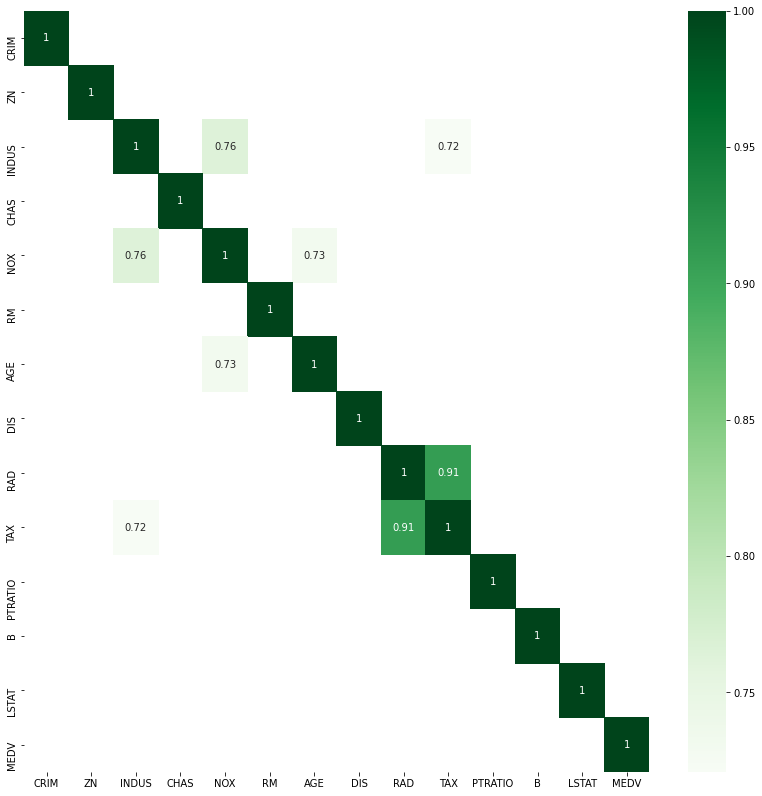

In [ ]:
#or 
co = df.corr()
cor = co[co>0.7]
plt.figure(figsize=(14,14))
sns.heatmap(cor,annot=True,cmap="Greens")
plt.show()

In [ ]:
# Splitting data
X = df.drop(["MEDV"],axis=1)  #inp
y = df["MEDV"]           #output

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

36.933255457118804
[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]


In [ ]:
# Creating a dataframe for coef
cof  = pd.DataFrame([X_train.columns,lm.coef_])
cof

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,-0.117735,0.0440175,-0.00576814,2.39342,-15.5894,3.76897,-0.00703518,-1.43496,0.240081,-0.0112973,-0.985547,0.00844443,-0.499117


In [ ]:
# Creating a dataframe for coef in vertical notaion
cof  = pd.DataFrame([X_train.columns,lm.coef_]).T
cof

,0,1
0,CRIM,-0.117735
1,ZN,0.0440175
2,INDUS,-0.00576814
3,CHAS,2.39342
4,NOX,-15.5894
5,RM,3.76897
6,AGE,-0.00703518
7,DIS,-1.43496
8,RAD,0.240081
9,TAX,-0.0112973


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_train_pred = lm.predict(X_train)

In [ ]:
#Calculating Adjusted r2 value
#1-(1-r)*(df.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
print("r2",r2_score(y_train,y_train_pred))
print('Adjusted R^2:', 1- (1-r2_score(y_train, y_train_pred))*(len(X_train)-1)/
                                 (len(X_train)-X_train.shape[1]-1))
print("MAE",mean_absolute_error(y_train,y_train_pred))
print("MAE",mean_squared_error(y_train,y_train_pred))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 0.7697699488741149
Adjusted R^2: 0.7615699744504532
MAE 3.1039668582990716
MAE 19.640519427908043
RMSE 4.431762564477935


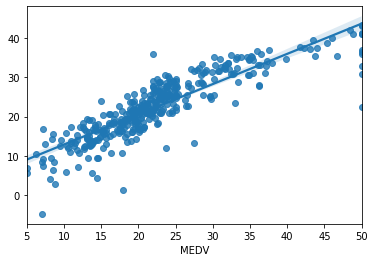

In [ ]:
#regplot (actual, predicted)
sns.regplot(y_train,y_train_pred)

Text(0, 0.5, 'predicted Price')

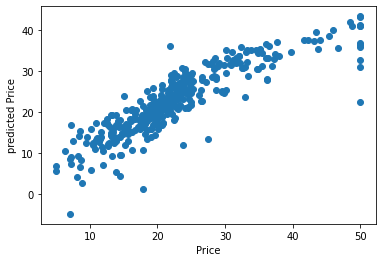

In [ ]:
#visualizing fifference between Actual amd predicted values
plt.scatter(y_train,y_train_pred)
plt.xlabel("Price")
plt.ylabel("predicted Price")

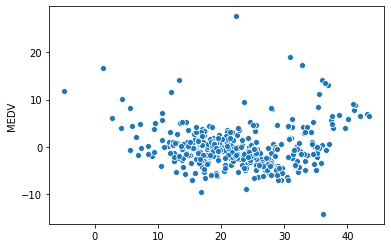

In [ ]:
# y_train - y_train_pred ==errors
sns.scatterplot(y_train_pred,y_train - y_train_pred)

In [ ]:
#Testing on test data
y_test_pred = lm.predict(X_test)

In [ ]:
#comparing y_test,y_test_pred
print(r2_score(y_test,y_test_pred))
print('Adjusted R^2:', 1- (1-r2_score(y_test, y_test_pred))*(len(X_test)-1)/
                                 (len(X_test)-X_test.shape[1]-1))
print("MAE",mean_absolute_error(y_test,y_test_pred))
print("MAE",mean_squared_error(y_test,y_test_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_test_pred)))

0.6354638433202133
Adjusted R^2: 0.5935260553836007
MAE 3.668330148135719
MAE 29.782245092302336
RMSE 5.4573111595640516
